Importing the Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [5]:
# Importing the car dataset as csv file to pandas dataframe
cars_dataset = pd.read_csv('cars_data.csv')

In [6]:
# Inspecting the dataset
cars_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,NaN,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,NaN,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [7]:
# Getting some information about the dataset
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4332 non-null   float64
 3   km_driven      4331 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [8]:
# Checking for missing values
cars_dataset.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False
4336,False,False,False,False,False,False,False,False
4337,False,False,False,False,False,False,False,False
4338,False,False,False,False,False,False,False,False


In [10]:
# Fillin_regg the NULL values wherever present with the median value of the respective columns
cars_dataset['selling_price'] = cars_dataset['selling_price'].fillna(cars_dataset['selling_price'].median())
cars_dataset['km_driven'] = cars_dataset['km_driven'].fillna(cars_dataset['km_driven'].median())

In [11]:
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4340 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   float64
 3   km_driven      4340 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 271.4+ KB


In [12]:
cars_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,350000.0,50000.0,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000.0,60000.0,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,Diesel,Individual,Manual,Second Owner


In [13]:
# Checking the distribution of categorical data
print(cars_dataset.fuel.value_counts())
print(" ")
print(cars_dataset.seller_type.value_counts())
print(" ")
print(cars_dataset.transmission.value_counts())
print(" ")
print(cars_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
 
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
 
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
 
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding the Categorical Data

In [14]:
# encoding "fuel" column
cars_dataset.replace({'fuel': {'Petrol':2, 'Diesel':3, 'CNG':1, 'LPG':0, 'Electric':4}}, inplace = True)

# encoding "seller_type" column
cars_dataset.replace({'seller_type': {'Dealer':1, 'Individual':0, 'Trustmark Dealer':2}}, inplace = True)

# encoding "transmission" column
cars_dataset.replace({'transmission': {'Manual':0, 'Automatic':1}}, inplace = True)

# encoding 'owner' column
cars_dataset.replace({'owner': {'First Owner':4, 'Second Owner':3, 'Third Owner':2, 'Fourth & Above Owner':1, 'Test Drive Car':0}}, inplace = True)
cars_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,2,0,0,4
1,Maruti Wagon R LXI Minor,2007,350000.0,50000.0,2,0,0,4
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,3,0,0,4
3,Datsun RediGO T Option,2017,250000.0,60000.0,2,0,0,4
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,3,0,0,3
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000.0,3,0,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,3,0,0,3
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,2,0,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,3,0,0,4


Looking for Outliers in 'selling_price' column

In [16]:
cars_dataset['selling_price'].describe()

count    4.340000e+03
mean     5.016828e+05
std      5.660141e+05
min      2.000000e+04
25%      2.100000e+05
50%      3.500000e+05
75%      6.000000e+05
max      8.900000e+06
Name: selling_price, dtype: float64

In [17]:
# Looking for outliers and removing them using the Percentile method
min_threshold, max_threshold = cars_dataset.selling_price.quantile([0.02,0.98])
min_threshold, max_threshold

(65000.0, 2419800.000000023)

In [18]:
cars_dataset[(cars_dataset.selling_price<min_threshold) | (cars_dataset.selling_price>max_threshold)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,2,0,0,4
13,Maruti 800 AC,2007,60000.0,70000.0,2,0,0,4
96,Audi A8 4.2 TDI,2013,2800000.0,49000.0,3,1,1,4
101,Mercedes-Benz E-Class Exclusive E 200 BSIV,2018,4500000.0,9800.0,2,1,1,4
102,BMW X1 sDrive 20d xLine,2017,2750000.0,13000.0,3,0,1,4
...,...,...,...,...,...,...,...,...
4224,Toyota Fortuner 2.7 2WD AT,2016,2500000.0,70000.0,2,0,1,3
4290,Maruti 800 Std,2004,37500.0,90000.0,2,0,0,3
4301,Maruti Alto LXI,2005,56000.0,23000.0,2,0,0,3
4304,Audi Q5 3.0 TDI Quattro Technology,2018,3899000.0,22000.0,3,1,1,4


In [313]:
# Removing the 172 outliers found in 'sellin_regg_price'
cars_dataset = cars_dataset[(cars_dataset.selling_price > min_threshold) & (cars_dataset.selling_price < max_threshold)]
cars_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1,Maruti Wagon R LXI Minor,2007,350000.0,50000.0,2,0,0,4
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,3,0,0,4
3,Datsun RediGO T Option,2017,250000.0,60000.0,2,0,0,4
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,3,0,0,3
5,Maruti Alto LX BSIII,2007,140000.0,125000.0,2,0,0,4
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000.0,3,0,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,3,0,0,3
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,2,0,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,3,0,0,4


Looking for the outliers in 'km_driven' column

In [19]:
cars_dataset['km_driven'].describe()

count      4340.000000
mean      66144.205760
std       46570.134858
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [20]:
# Looking for outliers and removing them using the Percentile method
min_threshold_km, max_threshold_km = cars_dataset.km_driven.quantile([0.02,0.98])
min_threshold_km, max_threshold_km

(5000.0, 185220.00000000026)

In [21]:
cars_dataset[(cars_dataset.km_driven<min_threshold_km) | (cars_dataset.km_driven>max_threshold_km)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
31,Maruti Vitara Brezza ZDi Plus AMT,2018,975000.0,4500.0,3,1,1,4
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000.0,350000.0,3,0,0,3
70,Toyota Corolla Altis Diesel D4DG,2011,350000.0,230000.0,3,0,0,4
133,Chevrolet Cruze LTZ,2015,1000000.0,3600.0,3,1,0,4
144,Hyundai EON Era Plus,2013,280000.0,3240.0,2,0,0,3
...,...,...,...,...,...,...,...,...
4231,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2011,800000.0,230000.0,3,0,0,4
4255,Mahindra XUV500 W8 2WD,2014,650000.0,218000.0,3,0,0,3
4275,Mahindra XUV500 W8 2WD,2014,650000.0,218000.0,3,0,0,3
4278,Honda Amaze S Petrol BSIV,2020,614000.0,1000.0,2,0,0,4


In [22]:
# Removing the 158 outliers found in 'km_driven'
cars_dataset = cars_dataset[(cars_dataset.km_driven > min_threshold_km) & (cars_dataset.km_driven < max_threshold_km)]
cars_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,2,0,0,4
1,Maruti Wagon R LXI Minor,2007,350000.0,50000.0,2,0,0,4
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,3,0,0,4
3,Datsun RediGO T Option,2017,250000.0,60000.0,2,0,0,4
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,3,0,0,3
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000.0,3,0,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,3,0,0,3
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,2,0,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,3,0,0,4


Looking for outliers in 'year' column

In [23]:
cars_dataset['year'].describe()

count    4137.000000
mean     2013.032632
std         4.163040
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64

In [24]:
# Looking for outliers and removing them using the Percentile method
min_threshold_yr, max_threshold_yr = cars_dataset.year.quantile([0.05,0.95])
min_threshold_yr, max_threshold_yr

(2005.0, 2018.0)

In [25]:
cars_dataset[(cars_dataset.year<min_threshold_yr) | (cars_dataset.year>max_threshold_yr)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
40,Jeep Compass 1.4 Sport Plus BSIV,2019,1400000.0,10000.0,2,0,0,4
52,Hyundai Grand i10 1.2 Kappa Asta,2019,500000.0,15000.0,2,0,0,4
61,Mahindra Jeep CL 500 MDI,1996,250000.0,35000.0,3,0,0,3
85,Hyundai Elite i20 Diesel Era,2019,650000.0,25000.0,3,0,0,4
110,Hyundai Elite i20 Sportz Plus Dual Tone BSIV,2019,750000.0,15000.0,2,0,0,4
...,...,...,...,...,...,...,...,...
4297,Hyundai Santro Sportz AMT,2019,484999.0,5007.0,2,1,1,4
4307,Mahindra Xylo H4,2019,599000.0,15000.0,3,0,0,2
4312,Maruti Ertiga 1.5 VDI,2019,1000000.0,15000.0,3,0,0,4
4313,Ford Endeavour 2.2 Titanium AT 4X2,2019,2800000.0,10000.0,3,0,1,4


In [26]:
# Removing the 324 outliers found in 'km_driven'
cars_dataset = cars_dataset[(cars_dataset.year > min_threshold_yr) & (cars_dataset.year < max_threshold_yr)]
cars_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000.0,70000.0,2,0,0,4
1,Maruti Wagon R LXI Minor,2007,350000.0,50000.0,2,0,0,4
2,Hyundai Verna 1.6 SX,2012,600000.0,100000.0,3,0,0,4
3,Datsun RediGO T Option,2017,250000.0,60000.0,2,0,0,4
4,Honda Amaze VX i-DTEC,2014,450000.0,141000.0,3,0,0,3
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999.0,80000.0,3,0,0,3
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999.0,80000.0,3,0,0,3
4337,Maruti 800 AC BSIII,2009,110000.0,83000.0,2,0,0,3
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000.0,90000.0,3,0,0,4


Saving the improved dataset as a .csv file

In [27]:
cars_dataset.to_csv('cars_dataset_improved.csv', index = False)

In [29]:
# Splitting the data into input and output variables 
X = cars_dataset.drop(["name", "selling_price"], axis=1)
X

,year,km_driven,fuel,seller_type,transmission,owner
0,2007,70000.0,2,0,0,4
1,2007,50000.0,2,0,0,4
2,2012,100000.0,3,0,0,4
3,2017,60000.0,2,0,0,4
4,2014,141000.0,3,0,0,3
...,...,...,...,...,...,...
4335,2014,80000.0,3,0,0,3
4336,2014,80000.0,3,0,0,3
4337,2009,83000.0,2,0,0,3
4338,2016,90000.0,3,0,0,4


In [30]:
Y = cars_dataset["selling_price"]
Y

0        60000.0
1       350000.0
2       600000.0
3       250000.0
4       450000.0
          ...   
4335    409999.0
4336    409999.0
4337    110000.0
4338    865000.0
4339    225000.0
Name: selling_price, Length: 3392, dtype: float64

Splitting the data into training and testing sets

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Model training via lin_regear Regression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [33]:
# Predicting on training data
train_data_pred = lin_reg.predict(X_train)

In [34]:
# R-squared error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R squared error: ", error_score)

R squared error:  0.4322035573561549


Visualise the Actual Prices and Predicted Prices on Training Data

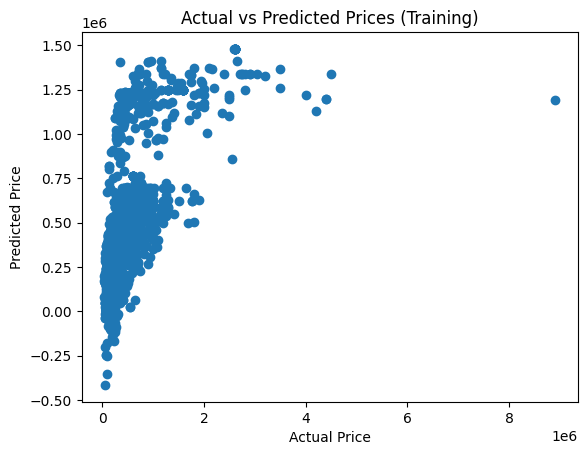

In [35]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Training)')
plt.show()

In [36]:
lin_reg.score(X_train, Y_train)

0.4322035573561549

In [37]:
# Predicting on test data
test_data_pred = lin_reg.predict(X_test)

In [38]:
# R-squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared error: ", error_score)

R squared error:  0.46689084311817985


Visualise the Actual Prices and Predicted Prices on Testing Data

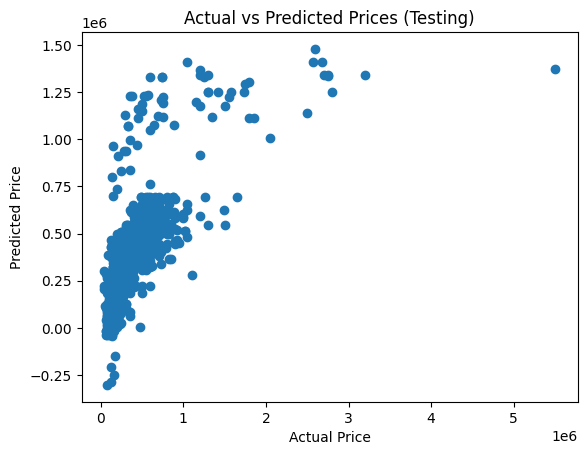

In [39]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Testing)')
plt.show()

In [40]:
lin_reg.score(X_test, Y_test)

0.46689084311817985

Model training via Lasso Regression (L1 Regularisation)

In [41]:
lasso_reg = Lasso(alpha=50, max_iter=1000, tol=0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, tol=0.1)

Model evaluation

In [42]:
# Predicting on train data
lasso_train_data_pred = lasso_reg.predict(X_train)

In [43]:
# R-squared error
lasso_error_score = metrics.r2_score(Y_train, lasso_train_data_pred)
print("R squared error: ", lasso_error_score)

R squared error:  0.4322033441411147


Visualise the Actual Prices and Predicted Prices on Training Data

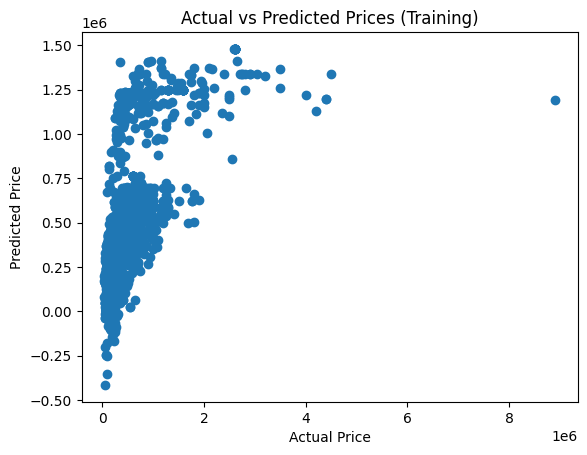

In [44]:
plt.scatter(Y_train, lasso_train_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Training)')
plt.show()

In [45]:
lasso_reg.score(X_train, Y_train)

0.4322033441411147

In [46]:
# Predicting on test data
lasso_reg_test_data_pred = lasso_reg.predict(X_test)

In [47]:
# R-squared error
lasso_reg_error_score = metrics.r2_score(Y_test, lasso_reg_test_data_pred)
print("R squared error: ", lasso_reg_error_score)

R squared error:  0.46689397745781414


Visualise the Actual Prices and Predicted Prices on Testing Data

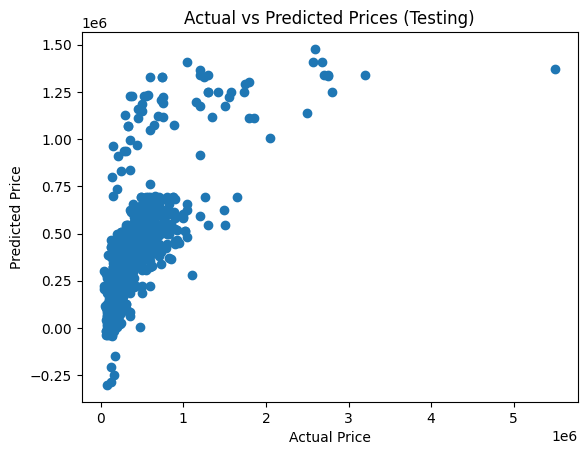

In [49]:
plt.scatter(Y_test, lasso_reg_test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Testing)')
plt.show()

In [50]:
lasso_reg.score(X_test, Y_test)

0.46689397745781414